# Exercise 3

In this exercise, you will simulate an experiment designed to measure the lifetime of an unstable particle X.  A beam of X particles is produced with a known average momentum and injected into a vacuum chamber.  Each X particle will travel some distance into the chamber before decaying at the "decay vertex", $\textbf{r}_{vtx}$.  The charged daughter particle is then detected by four tracking stations, located at various distances ($z_{stn}$) along the beam line.  Each tracking station measures the position where the track hits the station, $\textbf{r}_{hit}$.

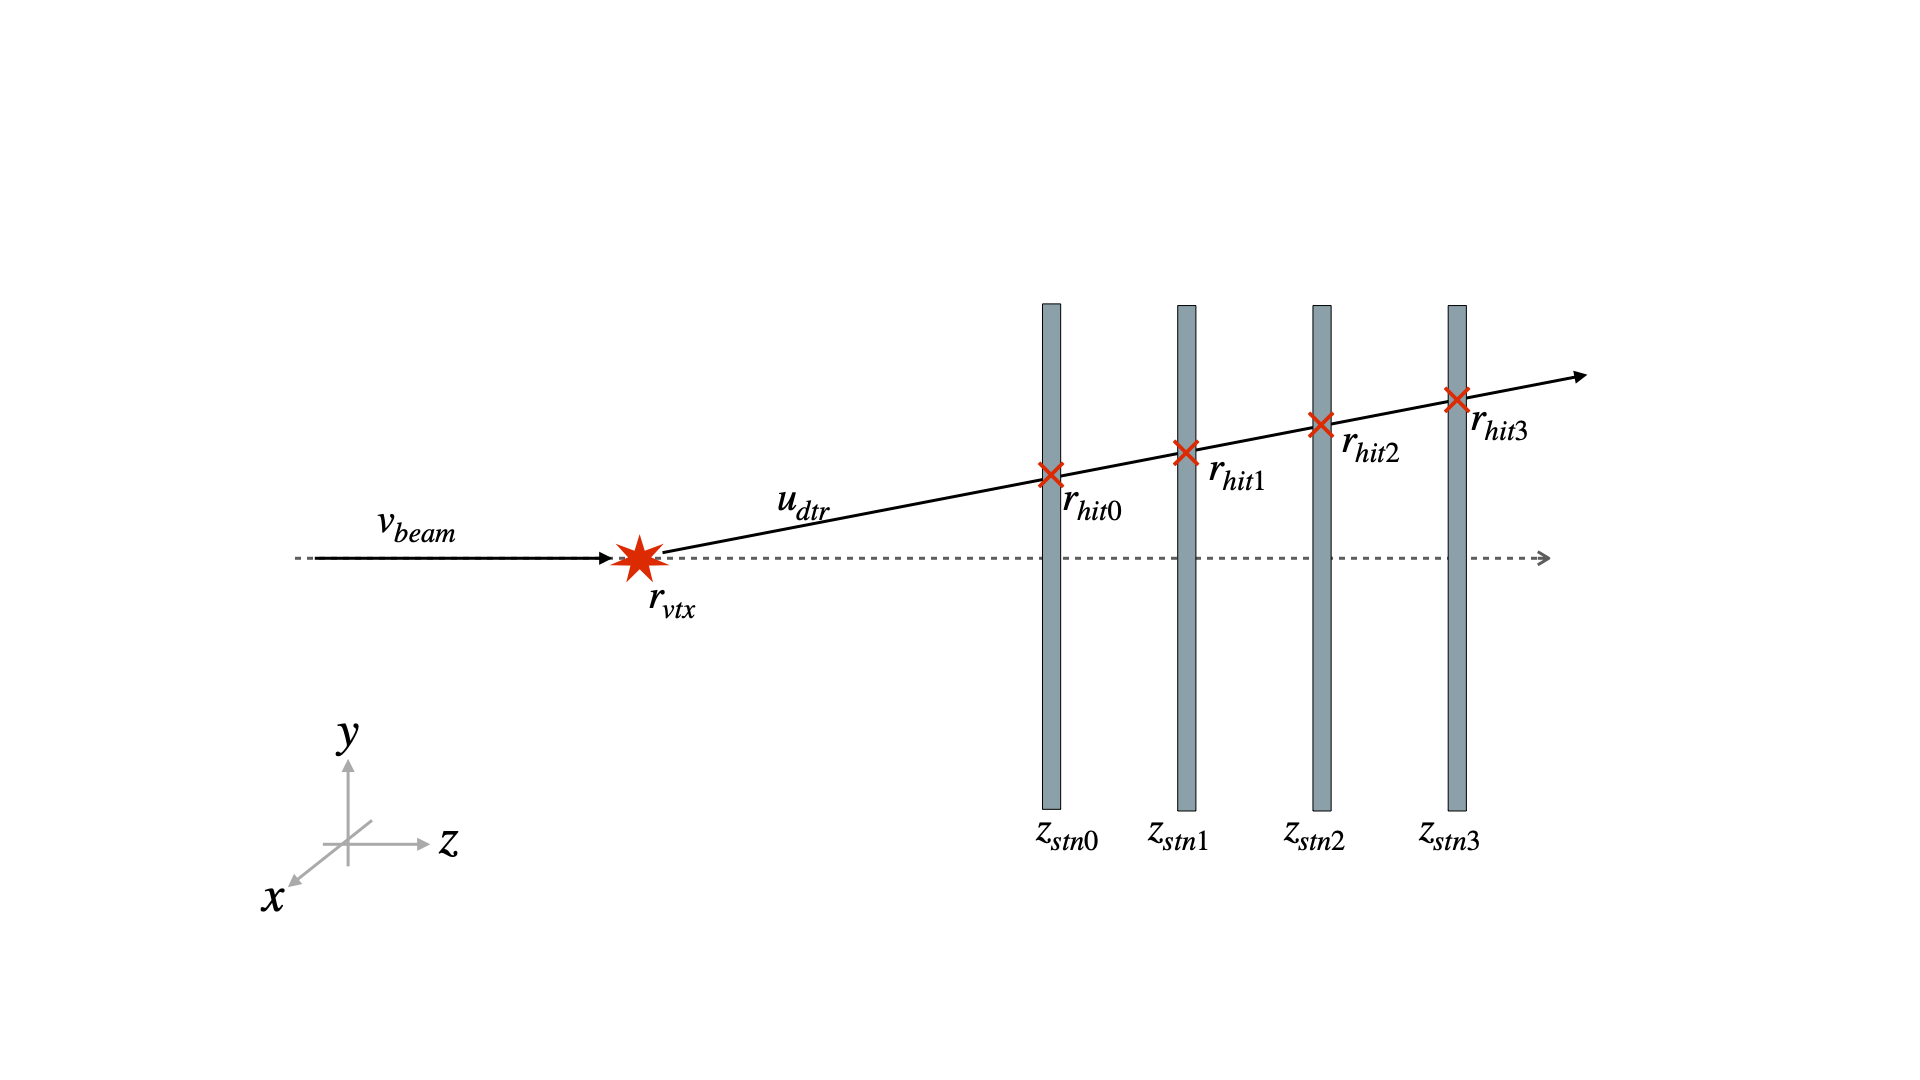

The coordinate system used is shown in the diagram, where the beam is produced at the origin and the average beam momentum is in the $z$-direction.

You will simulate the production and decay of particle X, as well as detection of its daughter particle. Each part of the exercise below deals with a different part of the experiment, for which you will generate random numbers with a specified distribution.  You will then verify the desired distribution is indeed produced - here a qualitative assessment is adequate, but a quantitative one is preferrable.

Use of simulation allows you to study the impact of different experimental choices, and your code should be capable of running with an arbitrary set of parameters. However, you can assume the initial set of parameters below : 
   * X mean lifetime, $\tau = 2.5 {\rm ms}$
   * Mean X velocity, $\mu_v = 2000 {\rm ms}^{-1}$
   * Std dev X velocity, $\sigma_v = 50 {\rm ms}^{-1}$
   * Tracking station positions, $z_{stn} = 30, 35, 40, 45 {\rm m}$
   * Tracking hit resolution, $\sigma_{rx, ry} = 0.01 {\rm m}$

It is strongly recommended that you use 3D vectors throughout the exercises, using numpy arrays, and numpy functions for vector algebra.

**Extensions**

A variety of extensions are possible to this exercise, drawing on some of the topics already covered in the unit. A few ideas are given below.  Please discuss any extension with the unit director before starting work.
   * Reconstructing the vertex location from the hit positions
   * Extracting the lifetime of the X particle from reconstructed vertex positions
   * Optimal placement of tracking stations


**Remember**
   * You are expected to use numpy and scipy libraries where appropriate.  
   * You should run each cell in order from the top of the notebook; there is no need to repeat code between cells
   * Use the "refresh kernel" button to reset everything and start again
   * Make sure your notebook runs fully & without errors, from a fresh kernel, before submitting it

## Part 1 - Beam Generation

First, you should simulate the production of X particles in the beam.  Each particle in the beam will have a velocity in the z-direction, that is drawn from a normal distribution with mean $\mu_{pz}$ and standard deviation $\sigma_{pz}$.  The particle should decay after a time that is drawn from an exponential distribution with mean lifetime $\tau$.  Given the velocity and the decay time, the decay position in the lab frame can then be calculated.  You can assume the beam is non-relativistic.

In the cell below, write functions to simulate the beam velocity, the decay time, and the decay vertex.

In [1]:
#Imports and problem setup
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import norm, expon, uniform, chisquare, linregress
rng = default_rng()

In [2]:
def beam_velocity(mean_pz, sd_pz, no_particles):
    '''
    Parameters
    ----------
    mean_pz: The mean velocity of the particle beam in the z-direction (m/s)
    sd_pz: The standard deviation of the velocity of the particle beam in 
            the z-direction (m/s).
    no_particles: The number of particles in the beam.

    Returns
    -------
    A 1D numpy array of length no_particles, in which each element is the velocity
    of a particle in the z-direction (m/s).
    Each element is from a normal distribution of mean 'mean_pz' and standard
    deviation 'sd_pz'.
    '''   
    z_vel_array = rng.normal(loc = mean_pz, scale = sd_pz, size=(int(no_particles)))
    return z_vel_array 
    
    
def decay_time(mean_lifetime, no_particles):
    '''
    Parameters
    ----------
    mean_lifetime: The mean lifetime of the particles in the beam (s).
    no_particles: The number of particles in the beam.

    Returns
    -------
    A 1D numpy array of length no_particles, in which each element is the 
    lifetime of a particle (s).
    Each element is from an exponential decay, with decay rate of 'mean_lifetime'.
    '''
    decay_times = rng.exponential(scale = mean_lifetime, size = int(no_particles))
    return decay_times
    
def decay_vertex(beam_velocity, decay_time):
    '''
    Parameters
    ----------
    beam_velocity: A numpy array of particle velocities in the z-direction (m/s).
                    Given from `beam_velocity()`.
    decay_time: A numpy array of particle lifetimes (s).
                Given from `decay_time()`.

    Returns
    -------
    A 2D numpy array, with 3 columns corresponding to x, y and
    z coordinates. A row gives the x,y and z coordinates of the decay
    vertex for an individual particle.
    '''   
    # distance = speed * time
    decay_position = beam_velocity * decay_time
    
    # Create the 2d array with x,y,z coordinates
    decay_position_3d = np.zeros((len(beam_velocity), 3))
    decay_position_3d[:, 2] = decay_position
    return decay_position_3d

In the next cell, test your functions, and verify that they have the desired distributions.

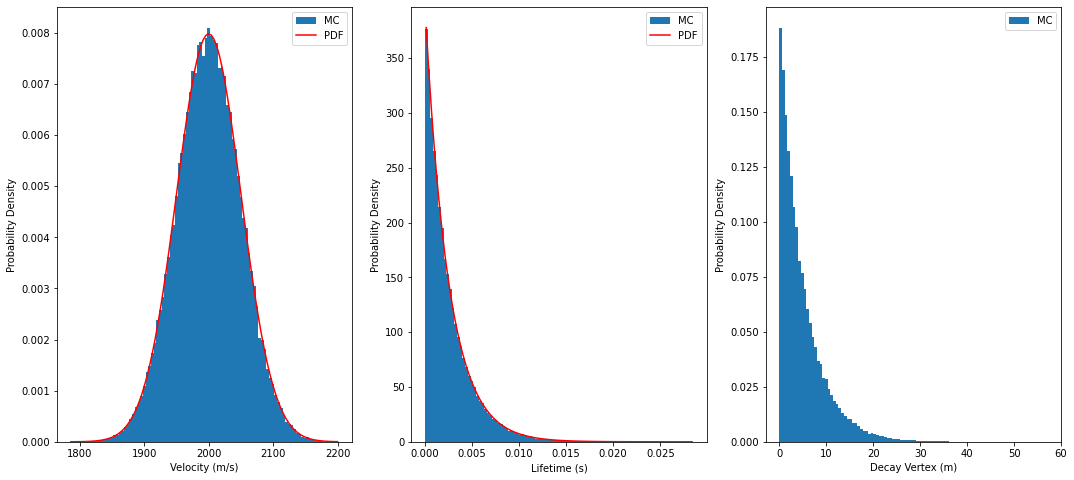

In [3]:
# Implement constants given in task
mean_pz = 2000         # mean particle velocity (m/s)
sd_pz = 50             # standard deviation of the particle velocity (m/s)
no_particles = 1e5  
mean_lifetime = 2.5e-3 # mean lifetime of a particle (s)

# Calculate the velocity, decay times and decay vertex distributions
z_vel_array = beam_velocity(mean_pz, sd_pz, no_particles)
decay_times = decay_time(mean_lifetime, no_particles)
decay_position = decay_vertex(beam_velocity = z_vel_array, decay_time = decay_times)

# set up plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,8))

# Plot velocity distribution on different axis, with an overlay of the expected shape.
n_norm, bins_norm, patches_norm = ax1.hist(z_vel_array, bins=100, density=True, label = 'MC')
bin_centres_norm = (bins_norm[1:] + bins_norm[:-1])/2
pdf_norm = norm.pdf(bin_centres_norm, mean_pz, sd_pz)
ax1.plot(bin_centres_norm, pdf_norm, 'r', label="PDF")
ax1.set_ylabel('Probability Density')
ax1.set_xlabel('Velocity (m/s)')
ax1.legend()

# Plot lifetime distribution on different axis, with an overlay of the expected shape.
n_exp, bins_exp, patches_exp = ax2.hist(decay_times, bins=100, density=True, label = 'MC')
bin_centres_exp = (bins_exp[1:] + bins_exp[:-1])/2
pdf_exp = expon.pdf(bin_centres_exp, scale= mean_lifetime)
ax2.plot(bin_centres_exp, pdf_exp, 'r', label="PDF")
ax2.set_ylabel('Probability Density')
ax2.set_xlabel('Lifetime (s)')
ax2.legend()

# Plot decay vertex distribution on different axis, with an overlay of the expected shape.
n_pos, bins_pos, patches_pos = ax3.hist(decay_position[:,2], bins=100, density = True, label = 'MC')
bin_centres_pos = (bins_pos[1:] + bins_pos[:-1])/2
ax3.set_ylabel('Probability Density')
ax3.set_xlabel('Decay Vertex (m)')
ax3.legend()
plt.show()

Use the formula for a chi squared test: $$\chi^{2}=\sum \frac{\left({O}_{i}-E_{i}\right)^{2}}{E_{i}},$$

where $\chi^{2}$ is the chi-squared value, O is the observed number of events and E is the expected number of events. (Equation from lab handbook).(Taken from the lab handbook)

In [4]:
def chi_square(bins, n, fit):
    '''
    Parameters
    ----------
    bins: An array of the edges of the bins from a histogram.
    n: An array of probability densitiy values of the histogram bins.
        Must be from a normalised histogram. 
    fit: The function that the chi square test should be carried out again.
        Must have the same number of data points as n, in the same positions as the bin centres.

    Returns
    -------
    A chi-squared value for how well the data fits the function.
    '''
    bin_width = bins[1] - bins[0]
    observed = n * bin_width
    expected = fit * bin_width
    chi_square = np.sum((observed - expected)**2 / expected)
    return chi_square

In [5]:
# Chi-Squared Tests

# Normal Distribution
chi2_norm = chi_square(bins_norm, n_norm, pdf_norm)
print(f'The chi squared value of the normal distribution is {chi2_norm:.4f}')

# Exponential Distribution
chi2_exp = chi_square(bins_exp, n_exp, pdf_exp)
print(f'The chi squared value of the exponential distribution is {chi2_exp:.4f}')

The chi squared value of the normal distribution is 0.0011
The chi squared value of the exponential distribution is 0.0011


## Part 2 - Daughter Particle

Now simulate the direction of the decay product, which should be _isotropic_ in the rest frame of the beam particle. This is the same as generating points on the surface of a unit sphere, with uniform probability over the solid angle $d\Omega$. This can be achieved in spherical coordinates, by generating the two angles, $\phi$ and $\theta$.  These should not have uniform distributions, since the area element is given by :

$${\rm d}\Omega = \sin(\theta) {\rm d}\phi {\rm d}\theta$$

To obtain uniform probability over the sphere, you should generate $\phi$ with a uniform distribution between $0$ and $2\pi$, and $\theta$ with a distribution proportional to $\sin \theta$.

**Notes**
   * we will assume the direction in the lab frame is equivalent to the direction in the beam particle rest frame. This is a valid approximation, provided the daughter particle has much higher momentum than the beam particle.
   * we will assume the daughter moves in a straight line, which means we do not need to compute its momentum, ie. the direction vector is a unit vector.

In [6]:
def dir_daughter(no_particles):
    '''
    Parameters
    ----------
    no_particles: The number of particles in the beam.

    Returns
    -------
    Two 1D numpy arrays, phi and theta, both of length no_particles.
    phi: 
        The azimuthal angle distribution that the daughter particle is
        travelling in, between 0 and 2*pi (rad).
    theta:
        The polar angle distribution that the daughter particle is
        travelling in, proportional to sin(theta) (rad), between 0 and pi.
    '''
    phi = rng.uniform(low =0, high =2* np.pi , size = int(no_particles))  # open end, so 0=<phi<2pi
    # Use the analytical Inverse Transform Method
    theta = np.arccos(1-2*rng.random(int(no_particles)))  
    return phi, theta

def cartesian(phi, theta):
    '''
    Parameters
    ----------
    phi: The azimuthal angle, between 0 and 2*pi (rad).
    theta: The polar angle, between 0 and pi (rad).

    Returns
    -------
    A 2D numpy array, with 3 columns corresponding to the x, y
    and z unit vector coordinates. 
    A row gives the x_hat, y_hat and z_hat values from the same 
    theta and phi. All values in meters.
    '''
    x_unit = np.sin(theta) * np.cos(phi)
    y_unit = np.sin(theta) * np.sin(phi)
    z_unit = np.cos(theta)
    # Create a 2d array with x,y,z coordinates
    cartesian_coords = np.stack((x_unit, y_unit, z_unit), axis=1)
    return cartesian_coords

As for Part 1, in the next cell, test your functions and verify the desired distributions are produced.

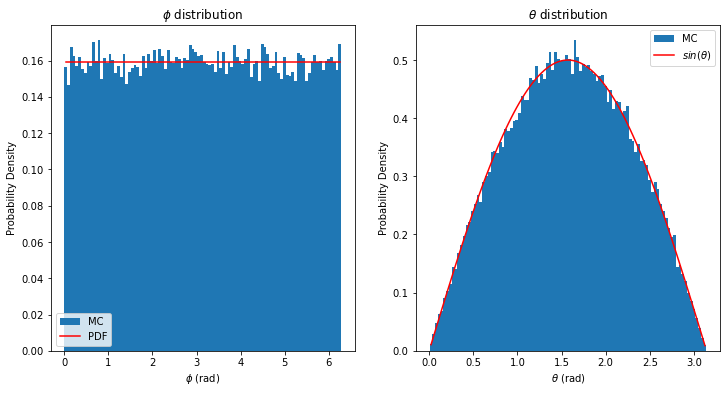

The chi squared value of the uniform fit is 0.0012
The chi squared value of the sin fit is 0.0012


In [7]:
# Find which direction the daughter travels in polar coords
phi, theta = dir_daughter(no_particles)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# plot the uniform distribution
n_phi, bins_phi, patches_phi = ax1.hist(phi, bins=100, density=True, label = 'MC')
bin_centres_phi = (bins_phi[1:] + bins_phi[:-1])/2
ax1.plot(bin_centres_phi, uniform.pdf(bin_centres_phi, scale = 2*np.pi), 'r', label = 'PDF')
ax1.set_ylabel('Probability Density')
ax1.set_xlabel(r'$\phi$ (rad)')
ax1.set_title(r'$\phi$ distribution')
ax1.legend(loc = 'lower left')

# plot the sinusoidal distribution
n_theta, bins_theta, patches_theta = ax2.hist(theta, bins=100, density=True, label = 'MC')
bin_centres_theta = (bins_theta[1:] + bins_theta[:-1])/2
ax2.plot(bin_centres_theta, np.sin(bin_centres_theta)/2, 'r', label=r'$sin(\theta)$')
ax2.set_ylabel('Probability Density')
ax2.set_xlabel(r'$\theta$ (rad)')
ax2.set_title(r'$\theta$ distribution')
ax2.legend()                 
    
plt.legend()
plt.show()

# Carry out chi-squared tests
fit_phi = uniform.pdf(bin_centres_phi, scale = 2*np.pi)
chi2_phi= chi_square(bins_phi, n_phi, fit_phi)
print(f'The chi squared value of the uniform fit is {chi2_phi:.4f}')

fit_theta = np.sin(bin_centres_theta)/2
chi2_theta = chi_square(bins_theta, n_theta, fit_theta)
print(f'The chi squared value of the sin fit is {chi2_theta:.4f}')

In [8]:
# Test Cell
# check if the sum of every squared element row is equal to 1, as it should be for a unit vector.

# convert polar coords to cartesian
cartesian_coords = cartesian(phi, theta) 

# Calculate the sum of squares for each row
row_sums = np.sum(cartesian_coords**2, axis=1)
  
atol = 1e-15 
# Check if each rows squared sum is within the specified tolerance of 1
if np.allclose(row_sums, 1, rtol=0, atol=atol):
    print(f'Unit vectors are correctly normalised to unit length, to a {atol} tolerance.')  
else:
    print('Unit vectors are not correclty normalised')

Unit vectors are correctly normalised to unit length, to a 1e-15 tolerance.


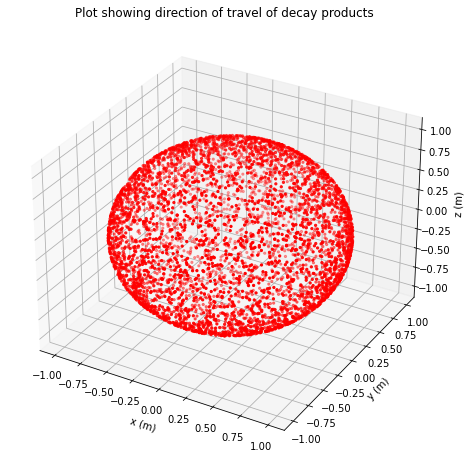

In [9]:
# Show that the direction of the daughter particle distribution is isotropic

no_particles_test = 5000  # set to a smaller no. particles here, so can see is uniform in 3d plot.
# generate polar coords
phi_test, theta_test = dir_daughter(no_particles_test)
# convert polar coords to cartesian
cartesian_coords_test = cartesian(phi_test, theta_test)             

# create scatter plot for 3d, to show isotropic distribution
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cartesian_coords_test[:,0], cartesian_coords_test[:,1], cartesian_coords_test[:,2], c='red', s=5)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_title('Plot showing direction of travel of decay products')
#ax.view_init(elev=90, azim=0)   # change if would like to see isotropic from different angles.
plt.show()   

## Part 3 - Propagation to Tracking Stations

The next step is to propagate the daughter particle to the tracking detectors. We can assume the particle takes a straight line path from the decay vertex. Since the tracking stations are at fixed values of $z$, the propagation is most easily performed by writing the path as two functions, giving the $x$ and $y$ coordinates as function of $z$ :

$$x(z) = m_x z + c_x$$
$$y(z) = m_y z + c_y$$

The gradients $m_x = \frac{dx}{dz}$ and $m_y = \frac{dy}{dz}$ can be computed directly from the components of the the daughter particle direction vector, $\textbf{u}_{dtr}$.

The intercepts $c_x$ and $c_y$, can then be found by solving the straight line equations given the $(x,y,z)$ coordinates of the decay vertex, $\textbf{r}_{vtx}$.

## My Workings
Find gradients using equations given above.

Then solve straight line equation given at the decay vertex to find the intercepts:

$x(z) = y(z) = 0 $

so,

$x(z=decay\_vertex\_z) = m_x * decay\_vertex\_z + c_x$

$0 =  m_x * decay\_vertex\_z + c_x$,

rearrange,
 
$c_x = -(m_x * decay\_vertex\_z)$

And doing identical calculation for y gives

$c_y = -(m_y * decay\_vertex\_z)$

In [10]:
# Create a mask, so only positive unit z are in the array, as only these ones can hit detectors
z_positive = (cartesian_coords[:,2] >= 0)

# apply mask to variables that are used going forwards
cartesian_coords = cartesian_coords[z_positive]
decay_position = decay_position[z_positive]

In [11]:
def track_equation(cartesian_coords):
    '''
    Parameters
    ----------
    cartesian_coords: A 2D numpy array, with 3 columns corresponding to the x, y
                      and z unit vector coordinates (m). 
                      Output from `cartesian()`.
                      
    Returns
    -------
    Four 1D numpy arrays.
    grad_x: The rate of change of x with z for each particle.
    grad_y: The rate of change of y with z for each particle.
    c_x: The x-intercept to a straight line equation (x = mz+c) for each particle (m). 
    c_y: The y-intercept to a straight line equation (y = mz+c) for each particle (m).
    '''
    # calculate gradients
    grad_x = cartesian_coords[:,0] / cartesian_coords[:,2]
    grad_y = cartesian_coords[:,1] / cartesian_coords[:,2]

    # calculate intercepts
    c_x = -grad_x * decay_position[:,2]   
    c_y = -grad_y * decay_position[:,2] 
    return grad_x, grad_y, c_x, c_y

In [12]:
# Define functions to calculate x and y position as a function of z, using equations given.
def x_path(grad_x, z, c_x):
    ''''
    Parameters
    ----------
    grad_x: The rate of change of x with z for each particle.
             Obtained from `track_equation()`.
    z: The z position of the particle (m).
    c_x: The x-intercept to a straight line equation for each particle (m). 
          Obtained from `track_equation()`.    
                      
    Returns
    -------
    The x-coordinate of the particle at the specified z (m).
    '''
    x = (grad_x * z) + c_x
    return x

def y_path(grad_y, z, c_y):
    '''
    Parameters
    ----------
    grad_y: The rate of change of y with z for each particle.
             Obtained from `track_equation()`.
    z: The z position of the particle (m).
    c_y: The y-intercept to a straight line equation for each particle (m). 
          Obtained from `track_equation()`.    
                      
    Returns
    -------
    The y-coordinate of the particle at the specified z (m).
    '''
    y = (grad_y * z) + c_y
    return y

In the next cell, test your track propagation functions. (A qualitative assessment is acceptable here).

In [13]:
# Set up the detectors
detector_pos = [30, 35, 40, 45]
grad_x, grad_y, c_x, c_y = track_equation(cartesian_coords)

# Create lists to append the positions of the particle when it hits the detector
all_x_hits = []
all_y_hits = []
for z in detector_pos:
    all_x_hits.append(x_path(grad_x, z, c_x))
    all_y_hits.append(y_path(grad_y, z, c_y))

# Put the hits on different detectors in a row    
grouped_hits_x = np.column_stack(all_x_hits)
grouped_hits_y = np.column_stack(all_y_hits)

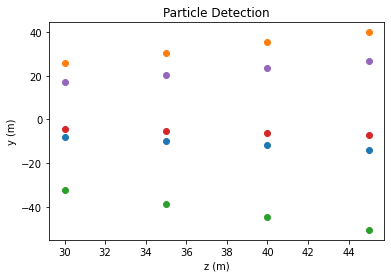

In [14]:
# Check moving w/ constant velocity

# plot the points of hitting tht detector w.r.t. y axis to show is moving in a straight line
for i in range(5):
    plt.scatter(detector_pos, grouped_hits_y[i,:])
plt.xlabel('z (m)')
plt.ylabel('y (m)')
plt.title('Particle Detection')
plt.show()

From the graph above, can see that particles are moving with constant velocity.

In [15]:
def plot_each_detector(detector_x, detector_y, grouped_hits_x, grouped_hits_y, detector_pos):
    '''
    Parameters
    ----------
    detector_x: float
                    The width of the x component of the detector either side of the origin (m).
    detector_y: float
                    The width of the y component of the detector either side of the origin (m).
    grouped_hits_x: 2D array. 
                     The x-coordinate of the particles at each detector, where each
                     row represents a particle, and each column represents a detector (m).  
    grouped_hits_y: 2D array. 
                     The y-coordinate of the particles at each detector, where each
                     row represents a particle, and each column represents a detector (m).
    detector_pos: An array of the z coordinate of each detector (m).
                      
    Returns
    -------
    no_hits_each_detector: A list of the number of hits on each detector.
    Also, plots the x-y plane at each detector.
    '''
    fig, axs = plt.subplots(1, 4, figsize=(16,8))
    
    # create an array to store number of hits at each detector
    no_hits_each_detector = []
    for i, ax in enumerate(axs):
        # add rectangle patch representing detector
        rect = patches.Rectangle((-detector_x, -detector_y), 2*detector_x, 2*detector_y,
                                 linewidth=1, edgecolor='black', facecolor='none')
        ax.add_patch(rect)

        hit_x = grouped_hits_x[:,i]
        hit_y = grouped_hits_y[:,i]

        # create detector hitting condition
        detector = (hit_x > -detector_x) & (hit_x < detector_x) & (hit_y > -detector_y) & (hit_y < detector_y)

        # apply it to particles, and store how many particles hit the detector
        no_hits = len(hit_x[detector])
        no_hits_each_detector.append(no_hits)

        # plot x-y plane for each detector 
        ax.scatter(hit_x[detector], hit_y[detector], color='r', label='inside', s=10)
        ax.scatter(hit_x[~detector], hit_y[~detector], color='black', label='outside', s=10)
        ax.set_xlim(-2*detector_x, 2*detector_x)
        ax.set_ylim(-2*detector_y, 2*detector_y)
        ax.set_ylabel('y (m)')
        ax.set_xlabel('x (m)')
        ax.set_aspect('equal')
        ax.set_title(f'Detector {i+1} , z = {detector_pos[i]} m')
        fig.suptitle('Plots of the x-y plane at each detector' , size=16)
        fig.subplots_adjust(top=1.375)

    plt.show()
    return no_hits_each_detector

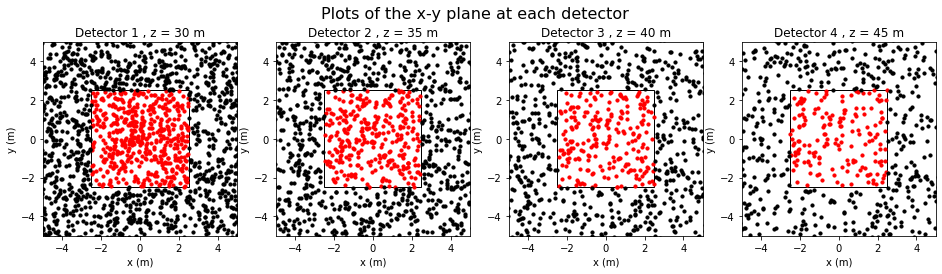

In [16]:
# Set the detector size ( = 2*detector_x/y)
detector_x = 2.5
detector_y = 2.5

# plot x-y plane at each detector
no_hits_each_detector = plot_each_detector(detector_x, detector_y, grouped_hits_x, grouped_hits_y, detector_pos)

## Part 4 - Hit Smearing

The tracking detectors are not perfect, and will measure position with finite resolution.  This can be simulated by adding offsets (in x and y directions) to the true hit position, where the offsets are drawn from a normal distribution with a mean of zero and a standard deviation equal to the resolution of the detector.  This process is known as smearing.

You should write a function which takes the true hit positions and smears them according to the detector resolution, to produce the reconstructed (or measured) hit positions.

In [17]:
def hit_smearing(grouped_hits_x, grouped_hits_y, res, detector_pos):
    '''
        ----------
    grouped_hits_x: 2D array. 
                     The x-coordinate of the particles at each detector, where each
                     row represents a particle, and each column represents a detector (m).
    grouped_hits_y: 2D array. 
                     The x-coordinate of the particles at each detector, where each
                     row represents a particle, and each column represents a detector (m).
    res: float
          The resolution of the detector.
    detector_pos: An array of the z coordinate of each detector (m).
                         
    Returns
    -------
    Two 2D numpy arrays.
    all_smeared_hits_x: The smeared x-coordinate of the particles at each detector, where each
                        row represents a particle, and each column represents a detector (m).
    all_smeared_hits_y: The smeared y-coordinate of the particles at each detector, where each
                        row represents a particle, and each column represents a detector (m).
    '''
    # create lists to store smeared hits to
    all_smeared_hits_x = []
    all_smeared_hits_y = []
    # loop over each detector
    for i in range(len(detector_pos)):
        # generate an offset in x and y
        offset_x = rng.normal(loc = 0, scale = res, size=(int(len(grouped_hits_x))))
        offset_y = rng.normal(loc = 0, scale = res, size=(int(len(grouped_hits_y))))
        
        # smear the detection
        smeared_hits_x = grouped_hits_x[:,i] + offset_x
        smeared_hits_y = grouped_hits_y[:,i] + offset_y

        # store the smeared detection value
        all_smeared_hits_x.append(smeared_hits_x)
        all_smeared_hits_y.append(smeared_hits_y)
        
    # manipulate so in same form as grouped_hits_x
    all_smeared_hits_x = np.array(all_smeared_hits_x).T
    all_smeared_hits_y = np.array(all_smeared_hits_y).T
    
    return all_smeared_hits_x, all_smeared_hits_y

Again, you should test your code to verify that the desire distributions are indeed produced.

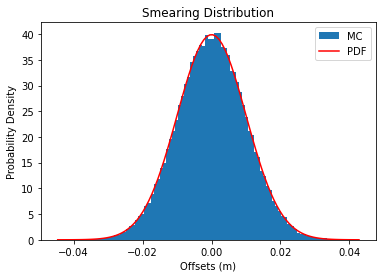

The chi squared value of the smearing fit is 0.00116


In [18]:
# show normal distribution fits shape

# set detector resolution
res = 0.01
# generate distribution of offsets
offset_x = rng.normal(loc = 0, scale = res, size=(int(no_particles)))

# plot distribution of offsets, and overlay normal distribution
n_res, bins_res, patches_res = plt.hist(offset_x, bins = 100, density=True, label = 'MC')
bin_centres_res = (bins_res[1:] + bins_res[:-1])/2
pdf_res = norm.pdf(bin_centres_res, 0, res)
plt.plot(bin_centres_res, pdf_res, 'r', label="PDF")
plt.ylabel('Probability Density')
plt.xlabel('Offsets (m)')
plt.title('Smearing Distribution')
plt.legend()
plt.show()

# complete chi-squared test
chi2_res = chi_square(bins_res, n_res, pdf_res)
print(f'The chi squared value of the smearing fit is {chi2_res:.5f}')

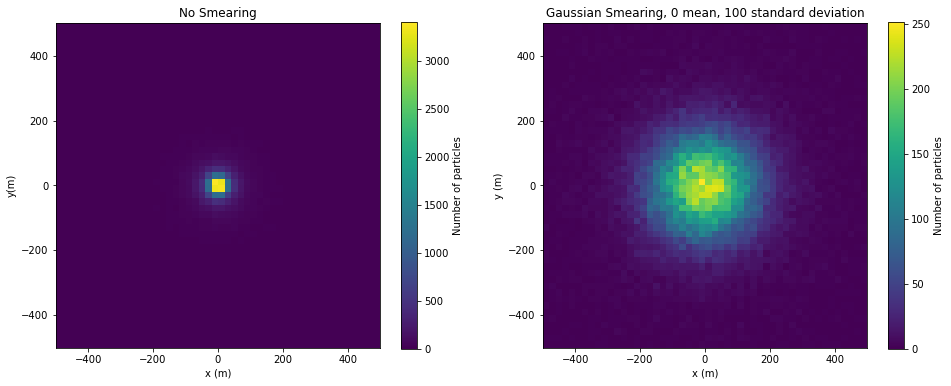

In [19]:
# Example with larger smearing, to show that smearing is working.
# shows that it moves x and y randomly and smears, by 100

res = 100   # set detector resolution
detector_pos = [30] 
all_smeared_hits_x, all_smeared_hits_y = hit_smearing(grouped_hits_x, grouped_hits_y, res, detector_pos)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

# set the edges of the bins along x and y
range1 = [[-5e2, 5e2], [-5e2, 5e2]]

# plot 2d histogram with no smearing
hist2d = ax1.hist2d(grouped_hits_x[:,0],grouped_hits_y[:,0], bins = 50, range = range1)
ax1.set_title('No Smearing')
ax1.set_aspect('equal')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('y(m)')
plt.colorbar(hist2d[3], label = 'Number of particles', ax=ax1, shrink = 0.75)

# plot 2d histogram with smearing
hist2d2 = ax2.hist2d(all_smeared_hits_x.flatten(), all_smeared_hits_y.flatten(), bins = 50, range = range1)
ax2.set_title(f'Gaussian Smearing, 0 mean, {res} standard deviation')
ax2.set_aspect('equal')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')
plt.colorbar(hist2d2[3], label = 'Number of particles', ax=ax2, shrink = 0.75)

plt.show()

## Part 5 - Experiment Simulation

Now you are ready to simulate the full experiment.  You should produce a large sample of events.  For each event, generate a beam particle, a daughter particle, and finally the true and smeared hits.

Given a sample of events, it is possible to compute a range of parameter distributions that will inform the design of the experiment.  You should present at least the following distributions :
   * The number of hit tracking stations
   * The 2D (x,y) distribution of measured hits on each of the four stations

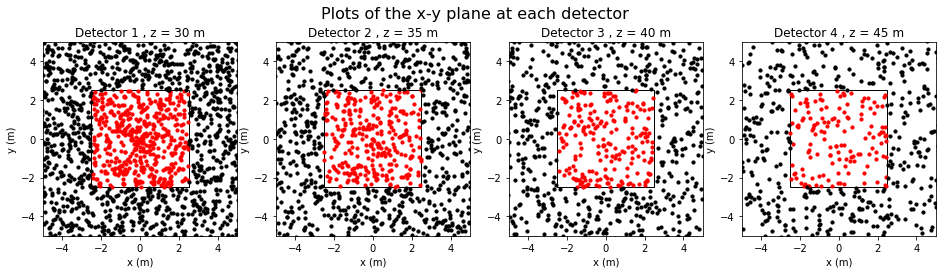

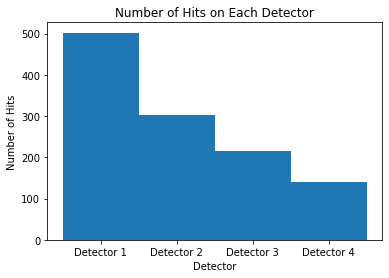

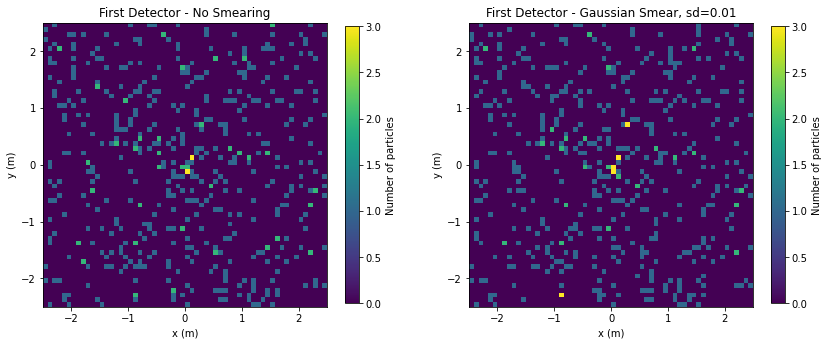

In [20]:
# Set variables given in task
mean_pz = 2000         # mean particle velocity (m/s)
sd_pz = 50             # standard deviation of the particle velocity (m/s)
no_particles = 1e5  
mean_lifetime = 2.5e-3 # mean lifetime of a particle (s)

# Calculate the velocity, decay times and decay vertex distributions
z_vel_array = beam_velocity(mean_pz, sd_pz, no_particles)
decay_times = decay_time(mean_lifetime, no_particles)
decay_position = decay_vertex(beam_velocity = z_vel_array, decay_time = decay_times)

# Generate the direction of travel of the daughter particles, in both polar and cartesian coords.
phi, theta = dir_daughter(no_particles)
cartesian_coords = cartesian(phi, theta)

# Create a mask, so only particles travelling forwards are in the array, as only these ones can hit detectors.
z_positive = (cartesian_coords[:,2] >= 0)

# apply mask to variables that are used going forwards
cartesian_coords = cartesian_coords[z_positive]
decay_position = decay_position[z_positive]

# calculate the paths the particles travel on
grad_x, grad_y, c_x, c_y = track_equation(cartesian_coords)

# Set up the detectors
detector_pos = [30, 35, 40, 45]

# Create lists to append the positions of the particle when it hits the detector
all_x_hits = []
all_y_hits = []
for z in detector_pos:
    all_x_hits.append(x_path(grad_x, z, c_x))
    all_y_hits.append(y_path(grad_y, z, c_y))

# Put the hits on different detectors in a row    
grouped_hits_x = np.column_stack(all_x_hits)
grouped_hits_y = np.column_stack(all_y_hits)

# set detector resolution
res = 0.01  # can change res=0 and see no smearing occurs
# calculate smeared detection points
all_smeared_hits_x, all_smeared_hits_y = hit_smearing(grouped_hits_x, grouped_hits_y, res, detector_pos)

# set the detector size, about the origin of the x-y plane
detector_x = 2.5
detector_y = 2.5
# plot the x-y plane at each detector
no_hits_each_detector = plot_each_detector(detector_x, detector_y, grouped_hits_x, grouped_hits_y, detector_pos)

# calculate number of hits on each detector
hit_counts = [no_hits_each_detector[0], no_hits_each_detector[1], no_hits_each_detector[2], no_hits_each_detector[3]]

# histogram showing number of particles at each detector,  not worth making a function as use once
plt.hist(range(1,5), bins=4, range=[0.5,4.5], weights=hit_counts)
plt.xticks(range(1,5), ['Detector 1', 'Detector 2', 'Detector 3', 'Detector 4'])
plt.xlabel('Detector')
plt.ylabel('Number of Hits')
plt.title('Number of Hits on Each Detector')
plt.show()

# Plot to show smearing effect At first detector, less efficeient to create a function
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
range1 = [[-detector_x, detector_x], [-detector_y, detector_y]]

# plot non smeared
hist2d = ax1.hist2d(grouped_hits_x[:,0],grouped_hits_y[:,0], bins = 60, range = range1)
ax1.set_title('First Detector - No Smearing')
ax1.set_ylabel('y (m)')
ax1.set_xlabel('x (m)')
ax1.set_aspect('equal')
plt.colorbar(hist2d[3], label = 'Number of particles', ax=ax1, shrink=0.85)

# plot smeared
hist2d2 = ax2.hist2d(all_smeared_hits_x[:,0], all_smeared_hits_y[:,0], bins = 60, range = range1)
ax2.set_title('First Detector - Gaussian Smear, sd=0.01')
ax2.set_ylabel('y (m)')
ax2.set_xlabel('x (m)')
ax2.set_aspect('equal')
plt.colorbar(hist2d2[3], label = 'Number of particles', ax=ax2, shrink=0.85)

plt.show()

# Vertex Reconstruction
I am approaching the vertex reconstruction with a reverse engineering approach. I am finding the vertices using the same method as the track propagation in the exercise, i.e propagate back an x path and the y path, finding where they both equal zero (the z-intercept) and then finding the average of these two points and label this point the reconstructed decay vertex.

This method was first tested on the grouped_hits_x and grouped_hits_y data, and shows perfect reconstruction, as expected as I am fitting the true positions of the particles with a line of best fit. To see this, uncomment the 'x = grouped_hits_x[:,:].T' and 'y = grouped_hits_y[:,:].T' lines, and it can be seen that the histograms match perfectly, so the reconstruction is working.

I then fitted a line of best fit through the 4 smeared points. This calculation produces intercepts at highly anomalous values around 1% of the time, so I apply a mask to ignore these unstable values, which limits the reconstructed decay vertices to the expected distribution values. It can then be seen that the reconstructed bins and the true bins then line up very well. I have done an investigation into the anomalous values, which can be seen a few cells below.

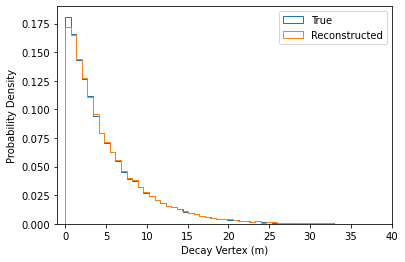

In my reconstruction method 445 values are anomolies and were masked.


In [33]:
# Reconstruct decay vertex

# data to fit reconstructed lines to
z = np.array(detector_pos)
x = all_smeared_hits_x[:,:].T
y = all_smeared_hits_y[:,:].T
#x = grouped_hits_x[:,:].T    # uncomment to see that it perfectly reconstructs
#y = grouped_hits_y[:,:].T    # decay vertexs from true values

# compute the coefficients of the polynomial
coefficients_x = np.polyfit(z, x, deg=1)
slopes_x = coefficients_x[0]
intercepts_x = coefficients_x[1]  

coefficients_y = np.polyfit(z, y, deg=1)
slopes_y = coefficients_y[0]
intercepts_y = coefficients_y[1]  

# find the z intercept (where x=y=0)
z_intercept_x = -intercepts_x / slopes_x
max_index_x = np.argmax(z_intercept_x)   # record the index of an anomolous value

z_intercept_y = -intercepts_y / slopes_y
max_index_y = np.argmax(z_intercept_y)   # record the index of an anomolous value

z_intercept_avg = (z_intercept_x + z_intercept_y) / 2

# Mask anomalous values, limit values to the same values as expected distribution, so bins line up
z_intercept_avg = z_intercept_avg[z_intercept_avg <= max(decay_position[:,2])]
z_intercept_avg = z_intercept_avg[0 <= z_intercept_avg]

# plot the true and reconstructed distributions and compare on the same histogram
plt.hist(decay_position[:,2], bins=100, density = True, histtype = 'step', label = 'True')
plt.hist(z_intercept_avg, bins = 100, density = True, histtype='step', label = 'Reconstructed')
plt.ylabel('Probability Density')
plt.xlabel('Decay Vertex (m)')
plt.legend()
plt.xlim(-1,40)
plt.show()

print(f'In my reconstruction method {len(decay_position)-len(z_intercept_avg)} values are anomolies and were masked.')

To calculate the mean lifetime, I have simply taken:

mean time = mean distance / mean speed, 

using the mean speed given in the task. 

I believe this is a fair method, as you could calculate the mean speed in a practical experiment and therefore use this calculation experimentally.

In [34]:
# Calculate mean lifetime of the particles, using mean speed and mean decay vertex.
mean_tau =  np.mean(z_intercept_avg) / mean_pz 

# Need to make a point that my reconstruction algo isnt v good and proper lol
print(f'Reconstructed mean lifetime is {mean_tau:.6f}')
print(f'True mean lifetime is {mean_lifetime}')

Reconstructed mean lifetime is 0.002537
True mean lifetime is 0.0025


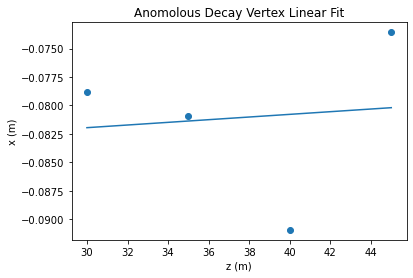

The decay vertex is at 729.57 meters


In [35]:
# Investigate why getting anomolous values

# data to fit reconstructed lines to
z = np.array(detector_pos)
x = all_smeared_hits_x[max_index_x,:].T   # want to plot to see the anomolous value, so use index

# compute the coefficients of the polynomial
coefficients1 = np.polyfit(z, x, deg=1)
slope = coefficients1[0]
intercept = coefficients1[1]

# create a polynomial function from the coefficients
poly_func1 = np.poly1d(coefficients1)

# generate a set of points that lie along the line
z_range = np.linspace(z.min(), z.max(), 100)
x_range = poly_func1(z_range)

# plot the data points and the line of best fit
plt.scatter(z, x)
plt.plot(z_range, x_range)
plt.xlabel('z (m)')
plt.ylabel('x (m)')
plt.title('Anomolous Decay Vertex Linear Fit')
plt.show()

z_intercept = -intercept / slope
print(f'The decay vertex is at {z_intercept:.2f} meters')

In [36]:
# A direct comparison of the true decay vertex, vs reconstructed in x and y for the same particles.
# See reconstructed is very similar in most cases, hence such a high accuracy in histogram

print(f' Calculated decay vertices from line of best fit x vs z: {np.round(z_intercept_x, 2)}')
print(f' Calculated decay vertices from line of best fit y vs z: {np.round(z_intercept_y, 2)}')
print(f' True decay verticies:                                   {np.round(decay_position[:,2],2)}')

 Calculated decay vertices from line of best fit x vs z: [0.93 2.52 5.36 ... 0.95 7.81 9.41]
 Calculated decay vertices from line of best fit y vs z: [0.95 2.57 5.75 ... 0.96 7.89 9.39]
 True decay verticies:                                   [0.95 2.52 5.56 ... 0.95 7.88 9.39]


From the above, it can be seen that the anomalies are produced when the particle is moving with near 0 x or y velocity (i.e. it continues in a straight line along z), which means that it has x or y values near 0 at all detectors. Then, when these particles are smeared their x or y value changes hugely relative to their current value, so then a line of best fit ends up being essentially flat, causing a very large z-intercept.

A possible solution to this could be to only reconstruct vertices where with a slope is above a threshold. Alteratively, another solution would be if the z intercept from x or y is particularly outside of the limit that I apply in the mask, then only include the reconstructed vertex from the other path (y or x), and do not take an average of the two. This should mean that anomalies are only found when x and y are both very close to 0 and smeared strongly, which should be a lot more rare.

Do this in the cell below, if interested uncomment it. If not leave it. It takes 5 minutes to run as the for loop is very inefficient, but it does reduce the number of anomolous values from around 400-500 to under 100, so it does make the code run better. It also make the reconstructed data fit the true data better, displayed in the histogram.

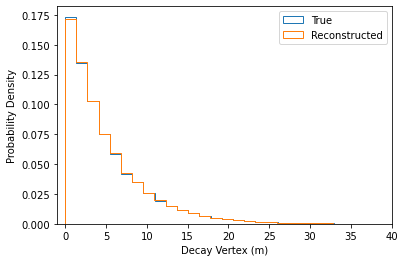

In this reconstruction method 66 values are anomolies and were masked.


In [32]:
# # Reconstruct decay vertex, with anomoly solution

# # data to fit reconstructed lines to
# z = np.array(detector_pos)
# x = all_smeared_hits_x[:,:].T
# y = all_smeared_hits_y[:,:].T
# #x = grouped_hits_x[:,:].T    # uncomment to see that it perfectly reconstructs
# #y = grouped_hits_y[:,:].T    # decay vertexs from true values

# # compute the coefficients of the polynomial
# coefficients_x = np.polyfit(z, x, deg=1)
# slopes_x = coefficients_x[0]
# intercepts_x = coefficients_x[1]  

# coefficients_y = np.polyfit(z, y, deg=1)
# slopes_y = coefficients_y[0]
# intercepts_y = coefficients_y[1]  

# # find the z intercept (where x=y=0)
# z_intercept_x = -intercepts_x / slopes_x
# max_index_x = np.argmax(z_intercept_x)   # record the index of an anomolous value

# z_intercept_y = -intercepts_y / slopes_y
# max_index_y = np.argmax(z_intercept_y)   # record the index of an anomolous value

# z_intercept_avg = np.zeros(len(z_intercept_x))
# lst = []
# # THIS LOOP TAKES AROUND 5 MINS TO RUN ON Noteable SERVER.
# for i in range(len(z_intercept_x)):  
#     if 0 <=z_intercept_x[i]<= max(decay_position[:,2]) and 0<= z_intercept_y[i] <= max(decay_position[:,2]):
#         z_intercept_avg[i] = (z_intercept_x[i] + z_intercept_y[i]) / 2
#     elif (0 > z_intercept_x[i] or z_intercept_x[i] >max(decay_position[:,2]) ) and 0<= z_intercept_y[i] <= max(decay_position[:,2]):
#         z_intercept_avg[i] = z_intercept_y[i]
#     elif (0 > z_intercept_y[i] or z_intercept_y[i] >max(decay_position[:,2]) ) and 0<= z_intercept_x[i] <= max(decay_position[:,2]):
#          z_intercept_avg[i] = z_intercept_x[i]
#     else:
#         lst.append(i)

# # Inspecting my method, I have found that some values are anomolies, so going to mask these values
# # limit z_intercept_avg values to the same values as decay_position, so bins line up.
# z_intercept_avg = z_intercept_avg[z_intercept_avg <= max(decay_position[:,2])]
# z_intercept_avg = z_intercept_avg[0 <= z_intercept_avg]

# # plot the true and reconstructed distributions and compare on the same histogram.
# plt.hist(decay_position[:,2], bins=50, density = True, histtype = 'step', label = 'True')
# plt.hist(z_intercept_avg, bins = 50, density = True, histtype='step', label = 'Reconstructed')
# plt.ylabel('Probability Density')
# plt.xlabel('Decay Vertex (m)')
# plt.xlim(-1,40)
# plt.legend()
# plt.show()

# print(f'In this reconstruction method {len(lst)} values are anomolies and were masked.')

## Part 6 - Summary

In the Markdown cell below, describe how your code solves the problem set. State any equations used in the solution and how they were obtained. Include your reasons for any libraries you used, as well as any particular programming techniques. Explain your choice of any test cases. Finally, state any salient features of the results you obtained. You are not expected to write more than about 400-500 words.

### Answer

This code uses Monte Carlo methods to generate a beam of particles and simulate particle decay, utilising a range of random distributions. It also simulates the detection of the decay products on a detector with finite size and resolution, and reconstructs the decay vertex.

Throughout the programme, I use `numpy.random.default_rng`, opposed to the legacy `numpy.random.random`. This is because it provides better random number generation, as it uses a more modern algorithm which generates a new random state for each instance, rather than a global random state.

For each Monte Carlo generated distribution, I overlayed a probability density function (PDF) of the distribution from `scipy.stats`, and performed a chi-squared test using the equation:

$$\chi^{2}=\sum_i \frac{\left({O}_{i}-E_{i}\right)^{2}}{E_{i}},$$
where $\chi^{2}$ is the chi-squared value, O is the observed number of events and E is the expected number of events. (Equation from lab handbook).

The result of the chi-squared test for all distributions throughout the task, with $10^5$ particles, was of order $10^{-3}$, which indicates a very strong fit, agreeing with observations from the histograms with the corresponding PDFs overlayed.

In `dir_daughter()` I generated a set of polar coordinates for the daughter particles direction of travel. To generate the azimuthal angle, phi, I use `rng.uniform`, as this generates a uniform distribution between two limits, with the upper limit being closed, as I desired for the angle to be $0 \le \theta < 2 \pi$. To generate the polar angle, theta, proportional to $sin(\theta)$, I used the analytical inverse transform method, as sin is analytically invertible so this method is valid. I chose this method, opposed to the accept/reject method due to its greater efficiency, as a portion of the generated numbers are unused (rejected) in the accept/reject method. I then use `cartesian()` to convert polar to cartesian coordinates, using equations: 

$$
x = r\sin(\theta)\cos(\phi), \newline
y = r\sin(\theta)\sin(\phi), \newline
z = r\cos(\theta)
$$

with $r=1$ to create unit vectors. (Equation from 2nd year Mathematical Physics).

I test whether my coordinates are unit vectors using `numpy.allclose`, which checks that all values in an array are close to a specified value within a given tolerance. I set the tolerance to $10^{-15}$, as in python rounding errors and deviations in the 16th significant figure can occur, due to the binary nature of stored floating point numbers.
The test returns a statement of whether all vectors produced are unit vectors.

Due to the detector positions, I create a mask that only passes particles travelling in the positive z direction. This is necessary to ensure that particles do not hit the detectors in ‘negative time’, as without the mask, the programme extrapolates the direction of the particles backwards.

Next, I create `plot_each_detector()`, which generates a plot of the x-y plane at each detector, allowing the size of the detector to be set. I made the detectors finite size, to make a more realistic setup, and plot the outline of each detector, with particles that hit the detector in red, and particles that miss it in black.

I initially created a function to make the 2d histograms, however with all of the different parameters in the two plots it ended up being more efficient to just create the plot each time.

In part 5, the histogram shows the number of hits decreasing with distance from the detector, appearing to follow the inverse square law, as expected from physical laws and set up of the system.
I also plotted the first detector as a 2d histogram, with and without smearing, to show the effect of smearing by a small resolution. The plot with no smearing agrees with the scatter plot for the first detector.

I reconstructed the decay vertices using the method described in the markdown cell titled 'Vertex Reconstruction'. I used `numpy.polyfit` to fit a line to the 4 datapoints, opposed to `scipy.linregress`, as it allowed me to calculate the gradient and intercept of every particle without having to run it over a for loop, which greatly increased the efficiency of this part of the task.
I found that my method created anomalous decay vertex values around 1% of the time. After further investigation, I found that when the particles had a small x/y velocity, the smearing effect was then large relative to their coordinates, which could lead to a line of best fit being near flat, so the z-intercept was hugely displaced. However, overall the decay vertex reconstruction worked very well for 99% of events, as can be seen by the histogram comparing true and reconstructed decay vertices. I also offer a further enhancement on the decay vertex reconstruction, but it is inefficient so I left it commented out, as the result improvement doesn't justify the hit to the codes efficiency (it is the final cell and can be ran if interested, just takes 5 mins).

Using the reconstructed mean decay vertex, and the mean particle velocity previously given, I then calculated the reconstructed mean lifetime, and compared it with the true mean lifetime.

Overall, the programme successfully simulates the generation of a particle beam, the particles decay to a daughter particle and the daughter particles detection by a particle detector, with a finite size and resolution. Furthermore, it reconstructs the decay vertex accurately for ~99% of events.